In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project2_clustering")

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format",lambda x: "% .3f"%x)

In [3]:
pwd

'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project2_clustering'

In [4]:
data=pd.read_csv(r"ML Project - Clustering Cancer Database U16955459050.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,...,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,M,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,...,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,M,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,...,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,M,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,...,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,M,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,...,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
pd.set_option('display.float_format', lambda x: '% .2f'%x)
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [7]:
data["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [8]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
def outlier_removal(data,columns):
    for col in columns:
        feature=data[col]
        q1=feature.quantile(0.25)
        q3=feature.quantile(0.75)
        IQR=q3-q1
        lower_lim=float(q1-1.5*IQR)
        upper_lim=float(q3+1.5*IQR)
        
        
        ### replacing outliers
        data[col]=np.where(data[col] < lower_lim, lower_lim,data[col])
        data[col]=np.where(data[col]> upper_lim,upper_lim,data[col])
        
    return data
num_col=data.select_dtypes(exclude="object")
num_col=outlier_removal(num_col,num_col.columns)
cat_col=data.select_dtypes(include="object")

In [10]:
import warnings
warnings.filterwarnings("ignore")
cat_col.columns

Index(['diagnosis'], dtype='object')

In [11]:
data=pd.concat((num_col,cat_col),axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
data=data.drop("id",axis=1)

In [13]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

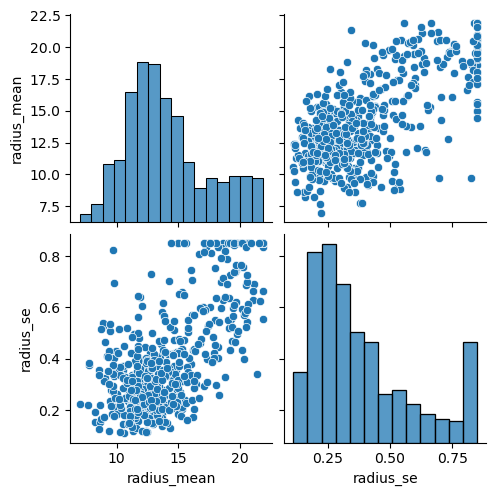

In [14]:
sns.pairplot(data[["radius_mean","radius_se"]]);

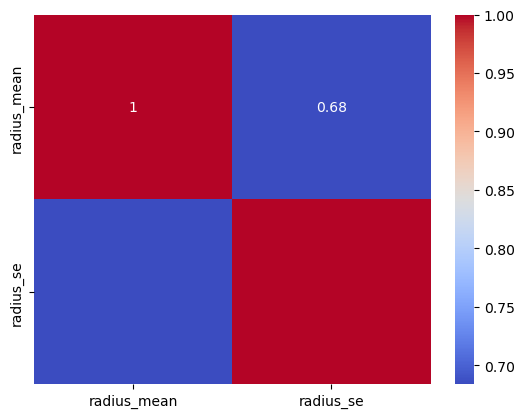

In [15]:
sns.heatmap(data[["radius_mean","radius_se"]].corr(),annot=True,cmap="coolwarm");


In [17]:
data1=data[["radius_mean","texture_mean"]]

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   radius_mean   569 non-null    float64
 1   texture_mean  569 non-null    float64
dtypes: float64(2)
memory usage: 9.0 KB


In [72]:
data1

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [20]:
sc1=MinMaxScaler()
sc2=StandardScaler()
sc3=RobustScaler()

In [76]:
data1[["radius_mean","texture_mean"]]=sc3.fit_transform(data1[["radius_mean","texture_mean"]])

In [21]:
data1

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage

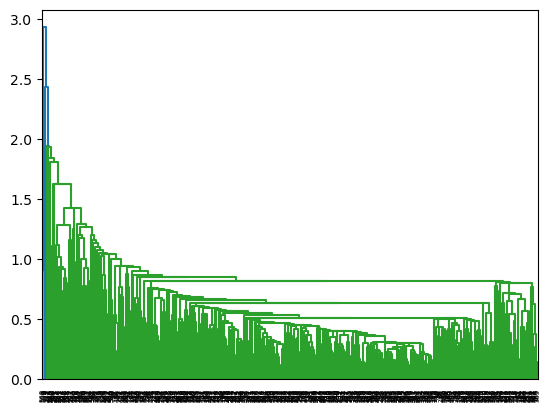

In [23]:
dendrogram(linkage(data1));

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
model=AgglomerativeClustering(n_clusters=2,linkage="ward")

data1["radius_mean"]=data1["radius_mean"].astype(int)
data1["texture_mean"]=data1["texture_mean"].astype(int)


In [26]:
data1["clusters"]=model.fit_predict(data1[["radius_mean","texture_mean"]])

In [32]:
data1

,radius_mean,texture_mean,clusters
0,17.99,10.38,1
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,1
4,20.29,14.34,0
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


In [33]:
from sklearn.cluster import KMeans

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(data1,data1["clusters"])

0.4247308070412614

In [36]:
model1=KMeans(n_clusters=2)

In [37]:
data2=data[["radius_mean","texture_mean"]]

In [38]:
data2["clusters"]=model1.fit_predict(data2)

In [39]:
data2

,radius_mean,texture_mean,clusters
0,17.99,10.38,1
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,1
4,20.29,14.34,1
...,...,...,...
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0


In [40]:
model1.cluster_centers_

array([[16.39507627, 22.99341102],
       [12.41009309, 16.60510511]])

In [41]:
silhouette_score(data2,data2["clusters"])

0.4359479305535066

In [46]:
result={"n_cluster":[],
"s_score":[]}

for i in range(2,11):
    model1=KMeans(n_clusters=i)
    result["n_cluster"].append(i)
    
    data2["clusters"]=model1.fit_predict(data2)
    result["s_score"].append(silhouette_score(data2,data2["clusters"]))
    
result=pd.DataFrame(result)
result
    


,n_cluster,s_score
0,2,0.44
1,3,0.44
2,4,0.38
3,5,0.42
4,6,0.43
5,7,0.49
6,8,0.46
7,9,0.51
8,10,0.51


s_score


In [105]:
wcss=[]

for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)

In [106]:
wcss

[12579.604194142674,
 9072.664683959953,
 6148.121623512791,
 4766.656807464069,
 3694.791441736461,
 3107.485212702847,
 2610.535098715709,
 2274.2653523977838,
 2085.0560598311677]

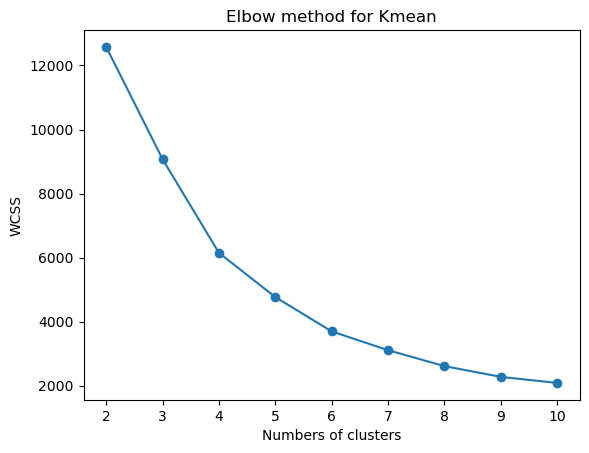

In [107]:
plt.plot(range(2,11),wcss,marker="o")
plt.title("Elbow method for Kmean")
plt.xlabel("Numbers of clusters")
plt.ylabel("WCSS")
plt.show()

In [108]:
# here numbers of cluster 5 or 6 is best 
for idx,score in enumerate(wcss,start=2):
    print(f"WCSS score for {idx} is {score}")

WCSS score for 2 is 12579.604194142674
WCSS score for 3 is 9072.664683959953
WCSS score for 4 is 6148.121623512791
WCSS score for 5 is 4766.656807464069
WCSS score for 6 is 3694.791441736461
WCSS score for 7 is 3107.485212702847
WCSS score for 8 is 2610.535098715709
WCSS score for 9 is 2274.2653523977838
WCSS score for 10 is 2085.0560598311677


In [109]:
final_model=KMeans(n_clusters=6,random_state=42)
data2["clusters"]=final_model.fit_predict(data2)
silhouette_score(data2,data2["clusters"])

0.4724124033165497